In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import re

In [2]:
# Week 2 Start: Ingestion of the Dataset

# File paths for each year
file_2019 = 'FFRank 2019.csv'
file_2020 = 'FFRank 2020.csv'
file_2021 = 'FFRank 2021.csv'
file_2022 = 'FFRank 2022.csv'

In [3]:
# Read each CSV file into a pandas DataFrame
df_2019 = pd.read_csv(file_2019)
df_2020 = pd.read_csv(file_2020)
df_2021 = pd.read_csv(file_2021)
df_2022 = pd.read_csv(file_2022)

In [4]:
# Display the first few rows of each dataset to ensure they loaded correctly
print("2019 Data Preview:\n", df_2019.head())
print("2020 Data Preview:\n", df_2020.head())
print("2021 Data Preview:\n", df_2021.head())
print("2022 Data Preview:\n", df_2022.head())

2019 Data Preview:
    Rank               Player Team Position  Age  Games Played  \
0     1  Christian McCaffrey  CAR       RB   23            16   
1     2        Lamar Jackson  BAL       QB   22            15   
2     3        Derrick Henry  TEN       RB   25            15   
3     4          Aaron Jones  GNB       RB   25            16   
4     5      Ezekiel Elliott  DAL       RB   24            16   

   Passing Completion  Passing Attempts  Passing Yards   Passing TDs  ...  \
0                   0                 2               0            0  ...   
1                 265               401            3127           36  ...   
2                   0                 0               0            0  ...   
3                   0                 0               0            0  ...   
4                   0                 0               0            0  ...   

   Rushing TDs  Targets  Recepotions  Receiving Yards  Yards per Reception  \
0           15      142          116            

In [5]:
# Check for missing values and data types for each year
print("2019 Data Information:")
print(df_2019.info())
print("\n2020 Data Information:")
print(df_2020.info())
print("\n2021 Data Information:")
print(df_2021.info())
print("\n2022 Data Information:")
print(df_2022.info())

2019 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Player               200 non-null    object 
 2   Team                 200 non-null    object 
 3   Position             200 non-null    object 
 4   Age                  200 non-null    int64  
 5   Games Played         200 non-null    int64  
 6   Passing Completion   200 non-null    int64  
 7   Passing Attempts     200 non-null    int64  
 8   Passing Yards        200 non-null    int64  
 9   Passing TDs          200 non-null    int64  
 10  Interceptions        200 non-null    int64  
 11  Rushing Attempts     200 non-null    int64  
 12  Rushing Yards        200 non-null    int64  
 13  Yards per Attempt    156 non-null    float64
 14  Rushing TDs          200 non-null    int64  
 15  Targets          

In [6]:
# Basic statistics for numerical columns (mean, min, max, etc.)
print("\n2019 Summary Statistics:")
print(df_2019.describe())
print("\n2020 Summary Statistics:")
print(df_2020.describe())
print("\n2021 Summary Statistics:")
print(df_2021.describe())
print("\n2022 Summary Statistics:")
print(df_2022.describe())


2019 Summary Statistics:
             Rank         Age  Games Played  Passing Completion  \
count  200.000000  200.000000    200.000000          200.000000   
mean   100.500000   26.330000     14.105000           51.680000   
std     57.879185    3.846437      2.460538          115.946174   
min      1.000000   21.000000      3.000000            0.000000   
25%     50.750000   24.000000     13.000000            0.000000   
50%    100.500000   25.500000     15.000000            0.000000   
75%    150.250000   28.000000     16.000000            0.000000   
max    200.000000   42.000000     17.000000          408.000000   

       Passing Attempts  Passing Yards   Passing TDs  Interceptions  \
count        200.000000      200.000000   200.000000     200.000000   
mean          80.795000      592.350000     3.775000       1.755000   
std          181.237935     1334.654668     8.575082       4.454682   
min            0.000000        0.000000     0.000000       0.000000   
25%            

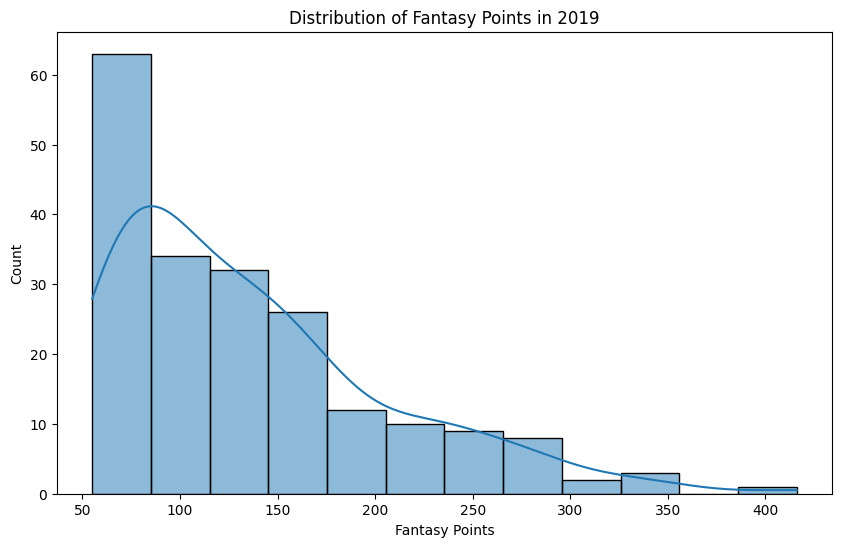

In [7]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2019['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2019')
plt.show()

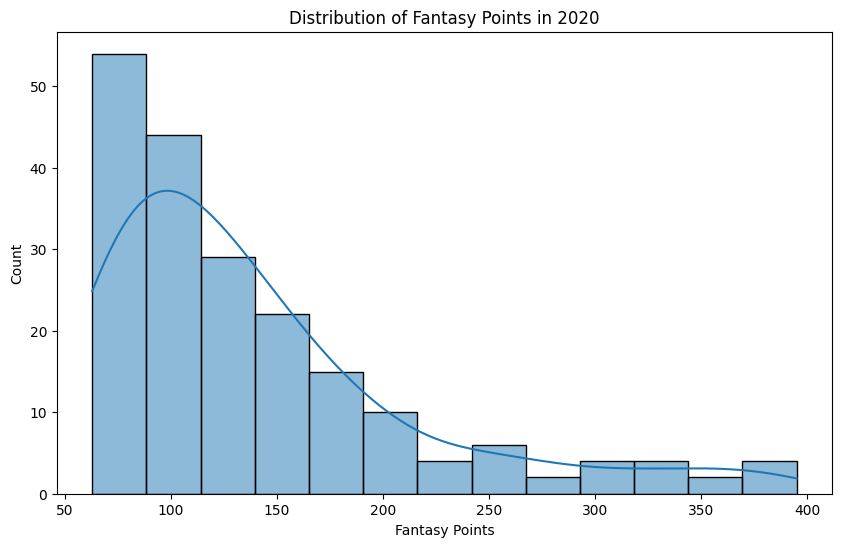

In [8]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2020['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2020')
plt.show()

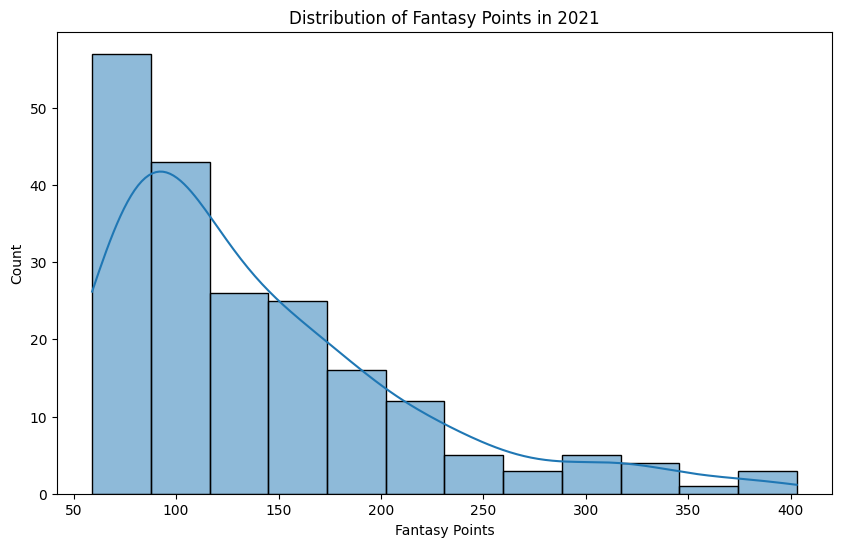

In [9]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2021['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2021')
plt.show()

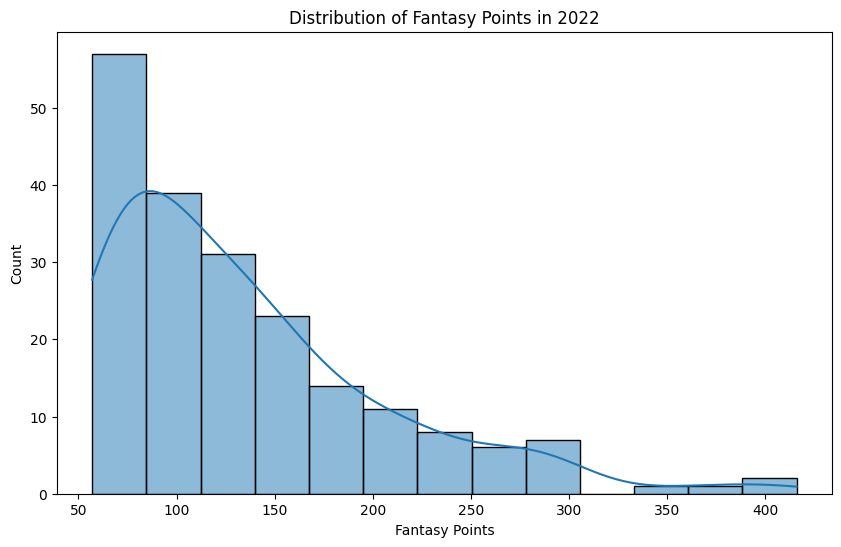

In [10]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2022')
plt.show()

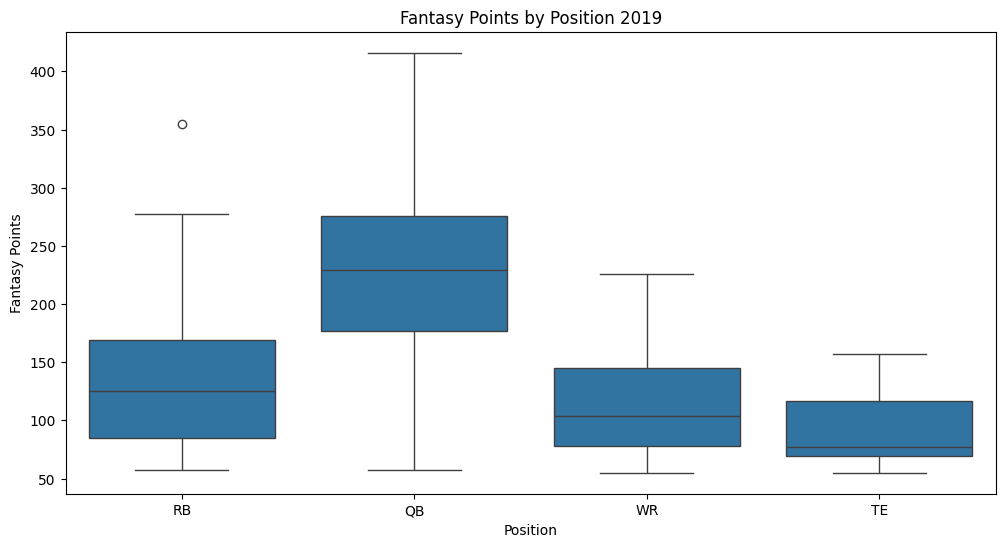

In [11]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2019)
plt.title('Fantasy Points by Position 2019')
plt.show()

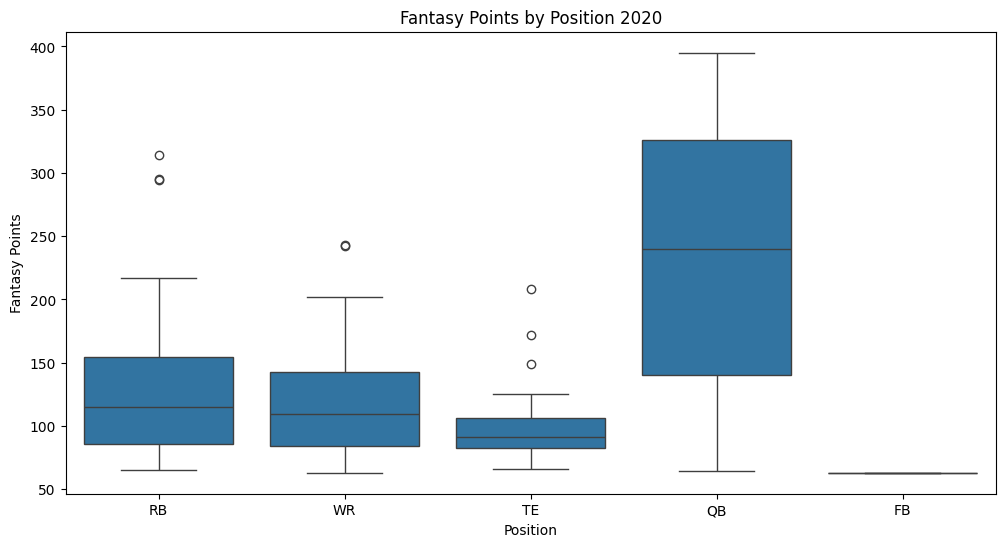

In [12]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2020)
plt.title('Fantasy Points by Position 2020')
plt.show()

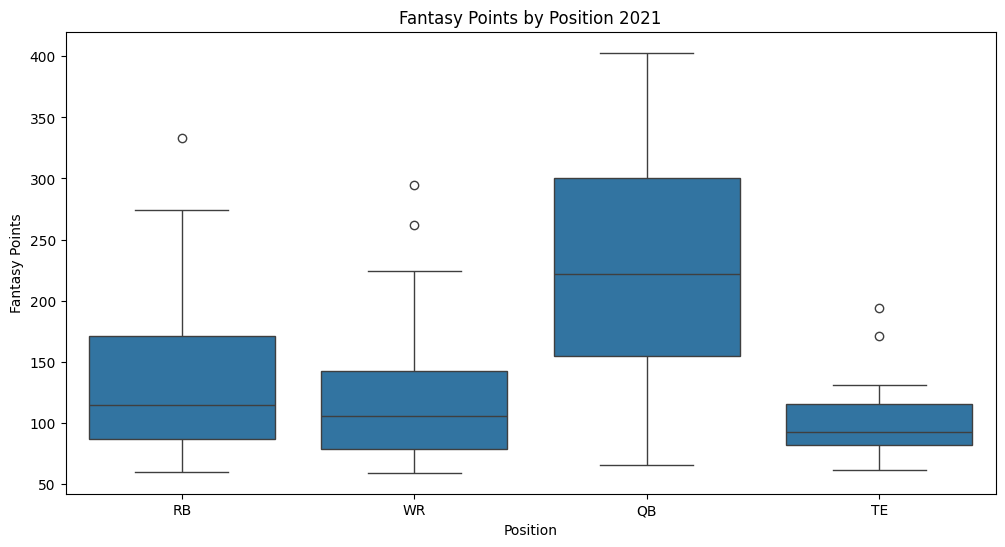

In [13]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2021)
plt.title('Fantasy Points by Position 2021')
plt.show()

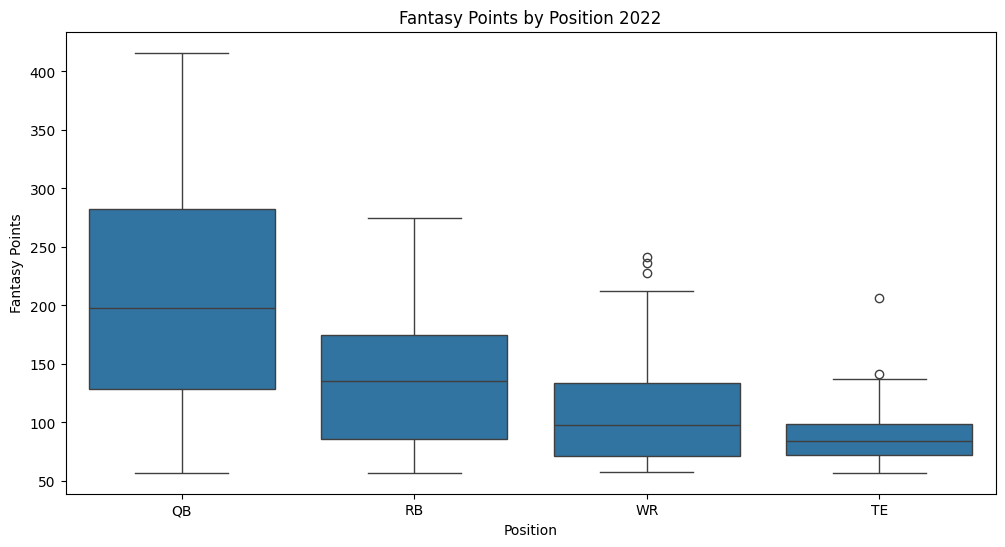

In [14]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2022)
plt.title('Fantasy Points by Position 2022')
plt.show()

In [15]:
# Week 3 Start

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)

# Clean player names by removing special characters
combined_df['Player'] = combined_df['Player'].str.replace(r'[^a-zA-Z.\s]', '', regex=True)

# Group by 'Player' and aggregate relevant numerical columns
aggregated_df = combined_df.groupby('Player').agg({
    'Rushing Yards': 'sum',
    'Receiving Yards': 'sum',
    'Passing Yards': 'sum',
    'Total TD': 'sum',
    'Fantasy Points': 'sum',
    'Games Played': 'sum',
    'Position': 'first',  # Get the first non-null position
}).reset_index()

# Calculate Yards from Scrimmage and Total Yards
aggregated_df['Yards_from_Scrimmage'] = aggregated_df['Rushing Yards'] + aggregated_df['Receiving Yards']
aggregated_df['Total_Yards'] = aggregated_df['Yards_from_Scrimmage'] + aggregated_df['Passing Yards']

# Calculate averages for aggregated statistics
aggregated_df['Avg_TD'] = aggregated_df['Total TD'] / aggregated_df['Games Played']
aggregated_df['Avg_Yards_from_Scrimmage'] = aggregated_df['Yards_from_Scrimmage'] / aggregated_df['Games Played']
aggregated_df['Avg_Passing_Yards'] = aggregated_df['Passing Yards'] / aggregated_df['Games Played']
aggregated_df['Avg_Total_Yards'] = aggregated_df['Total_Yards'] / aggregated_df['Games Played']

# Save the aggregated data to a new CSV file
aggregated_df.to_csv('aggregated_fantasy_data.csv', index=False)

Train Feature Set Shape: (288, 4)
Test Feature Set Shape: (72, 4)
Train Target Set Shape: (288,)
Test Target Set Shape: (72,)


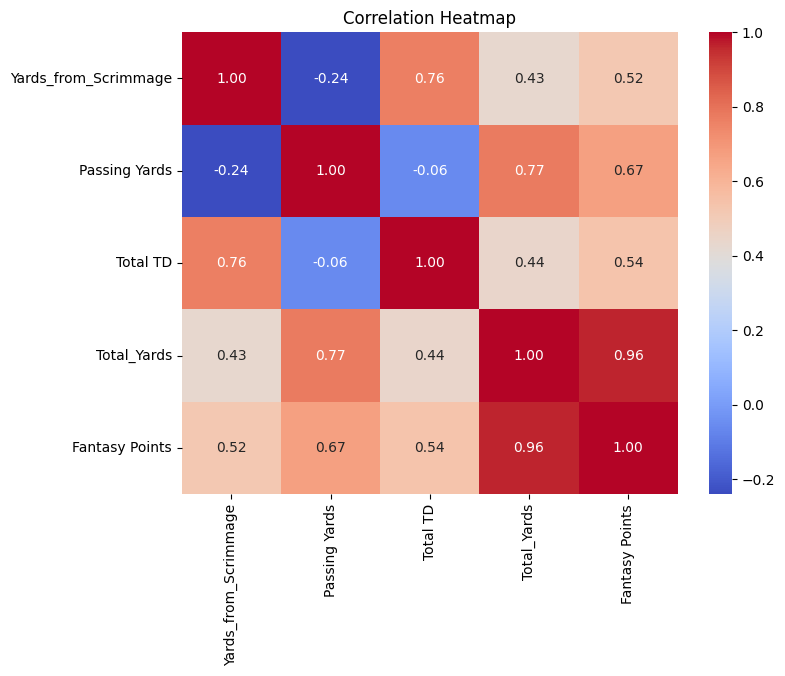

In [16]:
# Split Data (Train/Test)
X = aggregated_df[['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Total_Yards']]
y = aggregated_df['Fantasy Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split sizes
print("Train Feature Set Shape:", X_train.shape)
print("Test Feature Set Shape:", X_test.shape)
print("Train Target Set Shape:", y_train.shape)
print("Test Target Set Shape:", y_test.shape)

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = aggregated_df[['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Total_Yards', 'Fantasy Points']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#### Start of Week 4 ####
# Data Cleaning: Remove special characters from 'Player' column
aggregated_df['Player'] = aggregated_df['Player'].str.replace(r'[^a-zA-Z.\s]', '', regex=True)

In [18]:
# Handle missing data
imputer = SimpleImputer(strategy='mean')  # You can change the strategy based on needs (mean, median, etc.)
aggregated_df['Fantasy Points'] = imputer.fit_transform(aggregated_df[['Fantasy Points']])

In [19]:
# Outlier Treatment: Using IQR to detect and remove outliers in Fantasy Points
Q1 = aggregated_df['Fantasy Points'].quantile(0.25)
Q3 = aggregated_df['Fantasy Points'].quantile(0.75)
IQR = Q3 - Q1
# Filtering out outliers beyond 1.5*IQR
aggregated_df = aggregated_df[~((aggregated_df['Fantasy Points'] < (Q1 - 1.5 * IQR)) | (aggregated_df['Fantasy Points'] > (Q3 + 1.5 * IQR)))]

In [20]:
# Normalize and Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Fantasy Points']
aggregated_df[numerical_features] = scaler.fit_transform(aggregated_df[numerical_features])

# One-hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Dropping first to avoid multicollinearity
encoded_position = encoder.fit_transform(aggregated_df[['Position']])
encoded_df = pd.DataFrame(encoded_position, columns=encoder.get_feature_names_out(['Position']))
aggregated_df = pd.concat([aggregated_df, encoded_df], axis=1)

In [21]:
# Remove unnecessary columns (e.g., 'Team' column if not needed)
aggregated_df.drop(columns=['Team'], inplace=True, errors='ignore')

# Handle duplicates by removing any duplicate rows
aggregated_df.drop_duplicates(inplace=True)

In [22]:
# Text Data Cleaning (if applicable): removing stop words, punctuation, lowercasing
# This is included as an example in case you have text data, modify if needed
aggregated_df['Player'] = aggregated_df['Player'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()

# Aggregating relevant statistics (already done previously, no changes needed for now)
aggregated_df = aggregated_df.groupby('Player').agg({
    'Rushing Yards': 'sum',
    'Receiving Yards': 'sum',
    'Passing Yards': 'sum',
    'Total TD': 'sum',
    'Fantasy Points': 'sum',
    'Games Played': 'sum',
    'Position': 'first',
}).reset_index()

In [23]:
# Save processed data to a new CSV
aggregated_df.to_csv('processed_fantasy_data.csv', index=False)

print("Data processing complete. Here's the head of the cleaned dataframe:")
print(aggregated_df.head())

Data processing complete. Here's the head of the cleaned dataframe:
            Player  Rushing Yards  Receiving Yards  Passing Yards  Total TD  \
0      aaron jones         2987.0           1615.0      -0.311467  4.027857   
1     adam thielen           23.0           2785.0      -0.311467  2.532938   
2  adrian peterson         1502.0            243.0      -0.311467  1.038018   
3         aj brown           70.0           4491.0      -0.311467  2.532938   
4        aj dillon          803.0            519.0      -0.311467 -0.955208   

   Fantasy Points  Games Played Position  
0        2.730606          62.0       RB  
1        1.126495          55.0       WR  
2       -0.126419          31.0       RB  
3        1.914313          60.0       WR  
4        0.106129          34.0       RB  


In [24]:
##### Start of Week  5 ########
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load your dataset
df = pd.read_csv('aggregated_fantasy_data.csv')

# Feature 1: Create a new feature 'Total_Yards' by adding rushing and receiving yards
df['Total_Yards'] = df['Rushing Yards'] + df['Receiving Yards']

# Feature 2: Create 'Touchdown_Efficiency' by dividing total touchdowns by total yards
df['Touchdown_Efficiency'] = df['Total TD'] / df['Total_Yards']

# Feature 3: Create 'Fantasy Points per Game (FP_per_Game)' by dividing fantasy points by games played
df['FP_per_Game'] = df['Fantasy Points'] / df['Games Played']

# Drop NaN or infinite values that may result from division
df['Touchdown_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Touchdown_Efficiency'], inplace=True)

# View the new columns added
df[['Player', 'Rushing Yards', 'Receiving Yards', 'Total_Yards', 'Total TD', 'Touchdown_Efficiency', 'FP_per_Game']].head()


/tmp/ipykernel_640682/2416030159.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Touchdown_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)


,Player,Rushing Yards,Receiving Yards,Total_Yards,Total TD,Touchdown_Efficiency,FP_per_Game
0,A.J. Brown,70.0,4491,4561.0,21.0,0.004604,11.216667
1,A.J. Green,0.0,1371,1371.0,2.0,0.001459,5.218750
2,AJ Dillon,803.0,519,1322.0,0.0,0.000000,8.588235
3,Aaron Jones,2987.0,1615,4602.0,30.0,0.006519,13.629032
4,Aaron Rodgers,433.0,-10,423.0,4.0,0.009456,18.938462


In [25]:
# Select only numeric features (excluding player names or other categorical features)
numeric_columns = df.select_dtypes(include=['number']).columns

In [26]:
# Week 6: PCA

df = pd.read_csv('aggregated_fantasy_data.csv')
df['Total_Yards'] = df['Rushing Yards'] + df['Receiving Yards']
# Avoid division by zero
df['Touchdown_Efficiency'] = np.where(df['Total_Yards'] != 0, df['Total TD'] / df['Total_Yards'], 0)
df['FP_per_Game'] = df['Fantasy Points'] / df['Games Played']

# Split data first to prevent leakage
X = df[numeric_columns].drop(columns=['Fantasy Points'])
y = df['Fantasy Points']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['int64', 'float64']))

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Model
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)

# Evaluate the model
y_val_pred = grid_search.best_estimator_.predict(X_val_pca)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse}")
print(f"Validation R^2: {val_r2}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Validation RMSE: 159.2263800401631
Validation R^2: 0.7018433605794435


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Base model
rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)

# Predictions
y_train_pred_base = rf_base.predict(X_train)
y_val_pred_base = rf_base.predict(X_val)

# Metrics calculation
train_rmse_base = np.sqrt(mean_squared_error(y_train, y_train_pred_base))
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))

train_r2_base = r2_score(y_train, y_train_pred_base)
val_r2_base = r2_score(y_val, y_val_pred_base)

print(f"Base Model - Training RMSE: {train_rmse_base}, Validation RMSE: {val_rmse_base}")
print(f"Base Model - Training R²: {train_r2_base}, Validation R²: {val_r2_base}")

Base Model - Training RMSE: 18.48719200028916, Validation RMSE: 30.64079352395721
Base Model - Training R²: 0.9950859234251188, Validation R²: 0.9889588462379747


In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
rf_tuned = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Predictions
y_train_pred_tuned = grid_search.best_estimator_.predict(X_train)
y_val_pred_tuned = grid_search.best_estimator_.predict(X_val)

# Metrics calculation
train_rmse_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
val_rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
val_r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"Tuned Model - Training RMSE: {train_rmse_tuned}, Validation RMSE: {val_rmse_tuned}")
print(f"Tuned Model - Training R²: {train_r2_tuned}, Validation R²: {val_r2_tuned}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuned Model - Training RMSE: 16.94819532653518, Validation RMSE: 30.67567504124581
Tuned Model - Training R²: 0.9958700296141166, Validation R²: 0.9889336934028812


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Train Random Forest on PCA-transformed data
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predictions
y_train_pred_pca = rf_pca.predict(X_train_pca)
y_val_pred_pca = rf_pca.predict(X_val_pca)

# Metrics calculation
train_rmse_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
val_rmse_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_pca))

train_r2_pca = r2_score(y_train, y_train_pred_pca)
val_r2_pca = r2_score(y_val, y_val_pred_pca)

print(f"PCA Model - Training RMSE: {train_rmse_pca}, Validation RMSE: {val_rmse_pca}")
print(f"PCA Model - Training R²: {train_r2_pca}, Validation R²: {val_r2_pca}")

PCA Model - Training RMSE: 30.30089734988608, Validation RMSE: 159.26648103711102
PCA Model - Training R²: 0.9867988733775771, Validation R²: 0.7016931607936405


In [30]:
### Week 7 ###
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Data preparation (same as previous)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Define the model
xgb_base = xgb.XGBRegressor(random_state=42)

# Base model with default settings
xgb_base.fit(X_train_pca, y_train)
y_val_pred_base = xgb_base.predict(X_val_pca)
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))
val_r2_base = r2_score(y_val, y_val_pred_base)
print(f"Base XGBoost - Validation RMSE: {val_rmse_base}, Validation R²: {val_r2_base}")

# Variation 1 - Tune learning_rate and max_depth
param_grid_1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_model_1 = xgb.XGBRegressor(random_state=42)
grid_search_1 = GridSearchCV(estimator=xgb_model_1, param_grid=param_grid_1, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_1.fit(X_train_pca, y_train)
y_val_pred_1 = grid_search_1.best_estimator_.predict(X_val_pca)
val_rmse_1 = np.sqrt(mean_squared_error(y_val, y_val_pred_1))
val_r2_1 = r2_score(y_val, y_val_pred_1)
print(f"Variation 1 - Validation RMSE: {val_rmse_1}, Validation R²: {val_r2_1}")

Base XGBoost - Validation RMSE: 174.2240220019852, Validation R²: 0.6430310010910034
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 1 - Validation RMSE: 167.77154725766204, Validation R²: 0.6689825057983398


In [31]:
# Variation 2 - Tune alpha (L1) and lambda (L2)
param_grid_2 = {
    'alpha': [0, 0.1, 0.5],
    'lambda': [1, 1.5, 2]
}
xgb_model_2 = xgb.XGBRegressor(random_state=42)
grid_search_2 = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid_2, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_2.fit(X_train_pca, y_train)
y_val_pred_2 = grid_search_2.best_estimator_.predict(X_val_pca)
val_rmse_2 = np.sqrt(mean_squared_error(y_val, y_val_pred_2))
val_r2_2 = r2_score(y_val, y_val_pred_2)
print(f"Variation 2 - Validation RMSE: {val_rmse_2}, Validation R²: {val_r2_2}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 2 - Validation RMSE: 175.2347497133201, Validation R²: 0.638877272605896


In [32]:
# Variation 3 - Tune subsample and colsample_bytree
param_grid_3 = {
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}
xgb_model_3 = xgb.XGBRegressor(random_state=42)
grid_search_3 = GridSearchCV(estimator=xgb_model_3, param_grid=param_grid_3, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_3.fit(X_train_pca, y_train)
y_val_pred_3 = grid_search_3.best_estimator_.predict(X_val_pca)
val_rmse_3 = np.sqrt(mean_squared_error(y_val, y_val_pred_3))
val_r2_3 = r2_score(y_val, y_val_pred_3)
print(f"Variation 3 - Validation RMSE: {val_rmse_3}, Validation R²: {val_r2_3}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 3 - Validation RMSE: 183.33484034639557, Validation R²: 0.604720413684845


In [33]:
# Select the best model based on RMSE or R² on the validation set
results = {
    "Base": (val_rmse_base, val_r2_base),
    "Variation 1": (val_rmse_1, val_r2_1),
    "Variation 2": (val_rmse_2, val_r2_2),
    "Variation 3": (val_rmse_3, val_r2_3)
}

best_model = min(results, key=lambda x: results[x][0])  # Select based on lowest RMSE
print(f"Best model: {best_model}, RMSE: {results[best_model][0]}, R²: {results[best_model][1]}")

Best model: Variation 1, RMSE: 167.77154725766204, R²: 0.6689825057983398


In [34]:
### End of Week 7 ###

In [35]:
### Start of Week 8 ### 

In [36]:
# Import needed libraries

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [37]:
# Data preparation (same as previous)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [38]:
# Define the model
lgb_base = lgb.LGBMRegressor(random_state=42)

# Base model with default settings
lgb_base.fit(X_train_pca, y_train)
y_val_pred_base = lgb_base.predict(X_val_pca)
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))
val_r2_base = r2_score(y_val, y_val_pred_base)
print(f"Base LightGBM - Validation RMSE: {val_rmse_base}, Validation R²: {val_r2_base}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 5
[LightGBM] [Info] Start training from score 291.545139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [39]:
# Variation 1 - Tune learning_rate and num_leaves
param_grid_1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}
lgb_model_1 = lgb.LGBMRegressor(random_state=42)
grid_search_1 = GridSearchCV(estimator=lgb_model_1, param_grid=param_grid_1, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_1.fit(X_train_pca, y_train)
y_val_pred_1 = grid_search_1.best_estimator_.predict(X_val_pca)
val_rmse_1 = np.sqrt(mean_squared_error(y_val, y_val_pred_1))
val_r2_1 = r2_score(y_val, y_val_pred_1)
print(f"Variation 1 - Validation RMSE: {val_rmse_1}, Validation R²: {val_r2_1}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_split=2, n_estimators=300; total time=   2.0s
[CV] END max_depth=20, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=20, min_samples_split=5, n

In [40]:
# Variation 2 - Tune max_depth and min_child_samples
param_grid_2 = {
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}
lgb_model_2 = lgb.LGBMRegressor(random_state=42)
grid_search_2 = GridSearchCV(estimator=lgb_model_2, param_grid=param_grid_2, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_2.fit(X_train_pca, y_train)
y_val_pred_2 = grid_search_2.best_estimator_.predict(X_val_pca)
val_rmse_2 = np.sqrt(mean_squared_error(y_val, y_val_pred_2))
val_r2_2 = r2_score(y_val, y_val_pred_2)
print(f"Variation 2 - Validation RMSE: {val_rmse_2}, Validation R²: {val_r2_2}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [41]:
# Variation 3 - Tune bagging_fraction and feature_fraction
param_grid_3 = {
    'bagging_fraction': [0.6, 0.8, 1],
    'feature_fraction': [0.6, 0.8, 1]
}
lgb_model_3 = lgb.LGBMRegressor(random_state=42)
grid_search_3 = GridSearchCV(estimator=lgb_model_3, param_grid=param_grid_3, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_3.fit(X_train_pca, y_train)
y_val_pred_3 = grid_search_3.best_estimator_.predict(X_val_pca)
val_rmse_3 = np.sqrt(mean_squared_error(y_val, y_val_pred_3))
val_r2_3 = r2_score(y_val, y_val_pred_3)
print(f"Variation 3 - Validation RMSE: {val_rmse_3}, Validation R²: {val_r2_3}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [42]:
# Select the best model based on RMSE or R² on the validation set
results = {
    "Base": (val_rmse_base, val_r2_base),
    "Variation 1": (val_rmse_1, val_r2_1),
    "Variation 2": (val_rmse_2, val_r2_2),
    "Variation 3": (val_rmse_3, val_r2_3)
}

best_model = min(results, key=lambda x: results[x][0])  # Select based on lowest RMSE
print(f"Best model: {best_model}, RMSE: {results[best_model][0]}, R²: {results[best_model][1]}")

Best model: Variation 2, RMSE: 156.56716050438033, R²: 0.711719151261332
